In [1]:
################################################## Data Preperation 3A ##################################################################
## The data consist out of the patients that admitted at the Cardialogy Department.

## import Libraries 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox

    ## load data 
df = pd.read_excel (r'C:\Users\raudh\OneDrive\Bureaublad\Tue Schooljaar 2021\Afstudeerstage\Dataset\3A Check Patient flow unique dataset code.xlsx')
df.head()

,PatientNummer,OpnameNummer,OpnameSpecialisme,Specialisme,Verwijzer,OpnameDuurUur,OpnameDatumTijd,DefOpnameDatumTijd,DefOntslagDatumTijd,IngangsDatumTijd,...,DefOpnameDatumTijdVolgendeOpname,OpnameMutatieDuurUur,VolgNummerOpnameRegel,VolgNummerMutatieAfdelingRegel,VorigeAfdeling,VolgendeAfdeling,OpnameTypeOmschrijving,HerkomstOmschrijving,BestemmingOmschrijving,Weekdag
0,17027278010,646216,CAR,CAR,NaN,10.0,2014-09-25 01:00:00,2014-09-25 01:00:00,2014-09-25 11:55:00,2014-09-25 01:00:00,...,2015-01-20 12:45:00,10.0,1,1,NaN,NaN,Klinische opname,Eigen woonomgeving,Eigen woonomgeving,5
1,18064351751,701600,CAR,CAR,NaN,13.0,2015-10-28 08:00:00,2015-10-28 08:00:00,2015-10-28 21:05:00,2015-10-28 08:00:00,...,2015-12-28 08:18:00,12.0,1,1,NaN,3A,Dagbehandeling,Eigen woonomgeving,Eigen woonomgeving,4
2,18064351751,701600,CAR,CAR,NaN,13.0,2015-10-28 08:00:00,2015-10-28 08:00:00,2015-10-28 21:05:00,2015-10-28 20:57:00,...,2015-12-28 08:18:00,1.0,2,1,3E,NaN,Dagbehandeling,Eigen woonomgeving,Eigen woonomgeving,4
3,21062635757,702671,CAR,CAR,NaN,5.0,2015-12-07 12:41:00,2015-12-07 12:41:00,2015-12-07 17:50:00,2015-12-07 12:41:00,...,2017-07-07 23:56:00,5.0,1,1,NaN,NaN,Dagbehandeling,Eigen woonomgeving,Eigen woonomgeving,2
4,13086989036,702863,CAR,CAR,NaN,94.0,2015-10-17 17:22:00,2015-10-17 17:22:00,2015-10-21 15:00:00,2015-10-17 17:22:00,...,2016-01-16 19:50:00,23.0,1,1,NaN,3A,Klinische opname,Ander ziekenhuis,Eigen woonomgeving,7


In [2]:
## Creating unique Ward Patients (3A) (The Cardiology department consists out of 2 parts: Ward and Cardio Care Unit (CCU/3E))

df = df.loc[df['MutAfdeling'] == '3A']
df= df.loc[df['VolgNummerMutatieAfdelingRegel'] == 1]
df.head()

,PatientNummer,OpnameNummer,OpnameSpecialisme,Specialisme,Verwijzer,OpnameDuurUur,OpnameDatumTijd,DefOpnameDatumTijd,DefOntslagDatumTijd,IngangsDatumTijd,...,DefOpnameDatumTijdVolgendeOpname,OpnameMutatieDuurUur,VolgNummerOpnameRegel,VolgNummerMutatieAfdelingRegel,VorigeAfdeling,VolgendeAfdeling,OpnameTypeOmschrijving,HerkomstOmschrijving,BestemmingOmschrijving,Weekdag
0,17027278010,646216,CAR,CAR,NaN,10.0,2014-09-25 01:00:00,2014-09-25 01:00:00,2014-09-25 11:55:00,2014-09-25 01:00:00,...,2015-01-20 12:45:00,10.0,1,1,NaN,NaN,Klinische opname,Eigen woonomgeving,Eigen woonomgeving,5
2,18064351751,701600,CAR,CAR,NaN,13.0,2015-10-28 08:00:00,2015-10-28 08:00:00,2015-10-28 21:05:00,2015-10-28 20:57:00,...,2015-12-28 08:18:00,1.0,2,1,3E,NaN,Dagbehandeling,Eigen woonomgeving,Eigen woonomgeving,4
5,13086989036,702863,CAR,CAR,NaN,94.0,2015-10-17 17:22:00,2015-10-17 17:22:00,2015-10-21 15:00:00,2015-10-18 16:17:00,...,2016-01-16 19:50:00,71.0,2,1,3E,NaN,Klinische opname,Ander ziekenhuis,Eigen woonomgeving,7
9,9015505041,704627,CAR,CAR,NaN,60.0,2015-10-30 03:23:00,2015-10-30 03:23:00,2015-11-01 15:02:00,2015-10-31 12:07:00,...,2017-01-04 09:54:00,27.0,2,1,3E,NaN,Klinische opname,Eigen woonomgeving,Eigen woonomgeving,6
11,13094693019,704983,CAR,CAR,NaN,47.0,2015-11-03 14:00:00,2015-11-03 14:00:00,2015-11-05 13:20:00,2015-11-03 14:00:00,...,2016-01-05 14:28:00,47.0,1,1,NaN,NaN,Klinische opname,Ander ziekenhuis,Eigen woonomgeving,3


In [3]:
## Divide the patients into Emergency and Elective

df_3A  = df
Edf_3A = df[df.Spoed == False] 
Adf_3A = df[df.Spoed == True]

In [4]:
 ## Aggregate demand per date and creating Time series 

df_3A_ = df_3A.groupby(by =df_3A['IngangsDatumTijd'].dt.date).agg({'OpnameSpecialisme': 'count'})    
Edf_3A_ = Edf_3A.groupby(by =Edf_3A['IngangsDatumTijd'].dt.date).agg({'OpnameSpecialisme': 'count'})
Adf_3A_ = Adf_3A.groupby(by =Adf_3A['IngangsDatumTijd'].dt.date).agg({'OpnameSpecialisme': 'count'})

df_3A_.head()

,OpnameSpecialisme
IngangsDatumTijd,
2014-09-25,1
2015-03-27,1
2015-03-31,1
2015-05-25,1
2015-09-15,1


In [5]:
Edf_3A_.index = pd.to_datetime(Edf_3A_.index)
Edf_3A_.head()

,OpnameSpecialisme
IngangsDatumTijd,
2015-10-21,1
2015-10-28,1
2015-11-03,2
2015-11-05,4
2015-11-07,1


In [6]:
    # Change the index into date

Edf_3A_.index = pd.to_datetime(Edf_3A_.index)

    # Transform frequency into day 
Edf_3A_ = Edf_3A_.asfreq(freq='1D')

    #Sort per date
Edf_3A_ = Edf_3A_.sort_index(ascending = True)

    # Transform Null valus into 0
Edf_3A_ = Edf_3A_.fillna(value = 0)

    # show last rows 
display(Edf_3A_.tail())
    #######################################################
    # 
Adf_3A_.index = pd.to_datetime(Adf_3A_.index)

    #  
Adf_3A_ = Adf_3A_.asfreq(freq='1D')

    # 
Adf_3A_ = Adf_3A_.sort_index(ascending = True)

    # 
Adf_3A_ = Adf_3A_.fillna(value = 0)
    
    # 
display(Adf_3A_.tail())

    #######################################################
    #  
df_3A_.index = pd.to_datetime(df_3A_.index)

    # 
df_3A_ = df_3A_.asfreq(freq='1D')

    # 
df_3A_ = df_3A_.sort_index(ascending = True)

    # 
df_3A_ = df_3A_.fillna(value = 0)
    
    # 
display(df_3A_.tail())


,OpnameSpecialisme
IngangsDatumTijd,
2022-03-11,0.0
2022-03-12,0.0
2022-03-13,0.0
2022-03-14,0.0
2022-03-15,1.0


,OpnameSpecialisme
IngangsDatumTijd,
2022-03-19,5.0
2022-03-20,0.0
2022-03-21,3.0
2022-03-22,3.0
2022-03-23,3.0


,OpnameSpecialisme
IngangsDatumTijd,
2022-03-19,5.0
2022-03-20,0.0
2022-03-21,3.0
2022-03-22,3.0
2022-03-23,3.0


In [7]:
     ## Creating Week demand
Edf_3A_W = Edf_3A_.resample('W').sum()

    ##############################################################
Adf_3A_W = Adf_3A_.resample('W').sum()

    ##############################################################
df_3A_W = df_3A_.resample('W').sum()



     ## Only take time series between 2016-2021
Edf_3A_W = Edf_3A_W.loc['2016': '2021']
Adf_3A_W = Adf_3A_W.loc['2016': '2021']
df_3A_W = df_3A_W.loc['2016': '2021']

    ## Rename Columns
Adf_3A_W = Adf_3A_W.rename({'OpnameSpecialisme': '# of patients'}, axis='columns')
Adf_3A_W = Adf_3A_W.rename_axis('Date')

Edf_3A_W = Edf_3A_W.rename({'OpnameSpecialisme': '# of patients'}, axis='columns')
Edf_3A_W = Edf_3A_W.rename_axis('Date')

df_3A_W = df_3A_W.rename({'OpnameSpecialisme': '# of patients'}, axis='columns')
df_3A_W = df_3A_W.rename_axis('Date')

In [36]:
## Earlier research in the hospital found that seasonal effects could effect the inflow of patients
## Therefore different features are added to the data. 

cal =pd.read_excel (r'C:\Users\raudh\OneDrive\Bureaublad\Tue Schooljaar 2021\Afstudeerstage\Dataset\Calender data.xlsx',  index_col=0)
print(cal)

Edf_3A_W_Mul = Edf_3A_W
Adf_3A_W_Mul = Adf_3A_W
df_3A_W_Mul = df_3A_W

    ## Add week column en month colomn en year column
    
Edf_3A_W_Mul['week'] = Edf_3A_W.index.to_series().dt.strftime('%W').astype(int)
Adf_3A_W_Mul['week'] = Adf_3A_W.index.to_series().dt.strftime('%W').astype(int)
df_3A_W_Mul['week'] = Adf_3A_W.index.to_series().dt.strftime('%W').astype(int)

Edf_3A_W_Mul['month'] = Edf_3A_W_Mul.index.to_series().dt.strftime('%m').astype(int)
Adf_3A_W_Mul['month'] = Adf_3A_W_Mul.index.to_series().dt.strftime('%m').astype(int)
df_3A_W_Mul['month'] = df_3A_W_Mul.index.to_series().dt.strftime('%m').astype(int)

Edf_3A_W_Mul['year'] = Edf_3A_W_Mul.index.to_series().dt.strftime('%Y').astype(int)
Adf_3A_W_Mul['year'] = Adf_3A_W_Mul.index.to_series().dt.strftime('%Y').astype(int)
df_3A_W_Mul['year'] = df_3A_W_Mul.index.to_series().dt.strftime('%Y').astype(int)


   ## Calendar variabele 
Edf_3A_W_Mul = pd.merge(Edf_3A_W_Mul, cal, left_index=True, right_index=True)
Adf_3A_W_Mul = pd.merge(Adf_3A_W_Mul, cal, left_index=True, right_index=True)
df_3A_W_Mul =  pd.merge(df_3A_W_Mul, cal, left_index=True, right_index=True)

            vacation  holidays  seasonal  Sector 1  Sector 2  Sector 3  \
index                                                                    
2016-01-03         1         1         1         1         0         0   
2016-01-10         0         0         1         1         0         0   
2016-01-17         0         0         1         1         0         0   
2016-01-24         0         0         1         1         0         0   
2016-01-31         0         0         1         1         0         0   
...              ...       ...       ...       ...       ...       ...   
2021-11-28         0         0         6         0         0         0   
2021-12-05         0         0         6         0         0         0   
2021-12-12         0         0         6         0         0         0   
2021-12-19         0         0         6         0         0         0   
2021-12-26         0         1         6         0         0         0   

            Sector 4  Sector 5  Secto

In [40]:
df_3A_W_Mul

,# of patients,week,month,year,vacation,holidays,seasonal,Sector 1,Sector 2,Sector 3,Sector 4,Sector 5,Sector 6
Date,,,,,,,,,,,,,
2016-01-03,20.0,0,1,2016,1,1,1,1,0,0,0,0,0
2016-01-10,22.0,1,1,2016,0,0,1,1,0,0,0,0,0
2016-01-17,28.0,2,1,2016,0,0,1,1,0,0,0,0,0
2016-01-24,31.0,3,1,2016,0,0,1,1,0,0,0,0,0
2016-01-31,22.0,4,1,2016,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28,23.0,47,11,2021,0,0,6,0,0,0,0,0,1
2021-12-05,24.0,48,12,2021,0,0,6,0,0,0,0,0,1
2021-12-12,25.0,49,12,2021,0,0,6,0,0,0,0,0,1


In [41]:
Edf_3A_W_Mul

,# of patients,week,month,year,vacation,holidays,seasonal,Sector 1,Sector 2,Sector 3,Sector 4,Sector 5,Sector 6
Date,,,,,,,,,,,,,
2016-01-03,1.0,0,1,2016,1,1,1,1,0,0,0,0,0
2016-01-10,2.0,1,1,2016,0,0,1,1,0,0,0,0,0
2016-01-17,5.0,2,1,2016,0,0,1,1,0,0,0,0,0
2016-01-24,6.0,3,1,2016,0,0,1,1,0,0,0,0,0
2016-01-31,4.0,4,1,2016,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28,4.0,47,11,2021,0,0,6,0,0,0,0,0,1
2021-12-05,6.0,48,12,2021,0,0,6,0,0,0,0,0,1
2021-12-12,1.0,49,12,2021,0,0,6,0,0,0,0,0,1


In [42]:
Adf_3A_W_Mul

,# of patients,week,month,year,vacation,holidays,seasonal,Sector 1,Sector 2,Sector 3,Sector 4,Sector 5,Sector 6
Date,,,,,,,,,,,,,
2016-01-03,19.0,0,1,2016,1,1,1,1,0,0,0,0,0
2016-01-10,20.0,1,1,2016,0,0,1,1,0,0,0,0,0
2016-01-17,23.0,2,1,2016,0,0,1,1,0,0,0,0,0
2016-01-24,25.0,3,1,2016,0,0,1,1,0,0,0,0,0
2016-01-31,18.0,4,1,2016,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28,19.0,47,11,2021,0,0,6,0,0,0,0,0,1
2021-12-05,18.0,48,12,2021,0,0,6,0,0,0,0,0,1
2021-12-12,24.0,49,12,2021,0,0,6,0,0,0,0,0,1


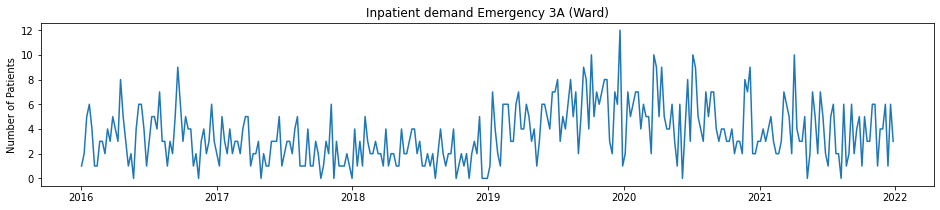

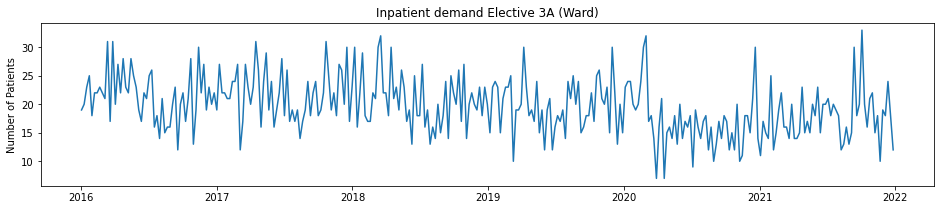

In [35]:
f, ax = plt.subplots(1,1)
f.set_size_inches((16,3))

ax.plot(Edf_3A_W['# of patients'])

# Add title
ax.set_title('Inpatient demand Emergency 3A (Ward)')
ax.set_ylabel('Number of Patients')

# Show graph
plt.show()
plt.close()

################################################################################
f, ex = plt.subplots(1,1)
f.set_size_inches((16,3))
ex.plot(Adf_3A_W['# of patients'])

# Add title
ex.set_title('Inpatient demand Elective 3A (Ward)')
ex.set_ylabel('Number of Patients')

# Show graph
plt.show()
plt.close()